## **CNN with CIFAR-10 Data**

In [3]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

In [4]:
np.set_printoptions(suppress=True)

In [5]:
print(tf.__version__)

2.8.0


In [8]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [10]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [11]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

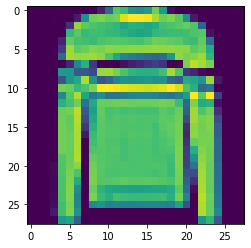

In [12]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [13]:
y_train[5]

2

In [14]:
y_train.shape

(60000,)

In [15]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

[bağlantı metni](https://)**Class names:**

Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

In [19]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

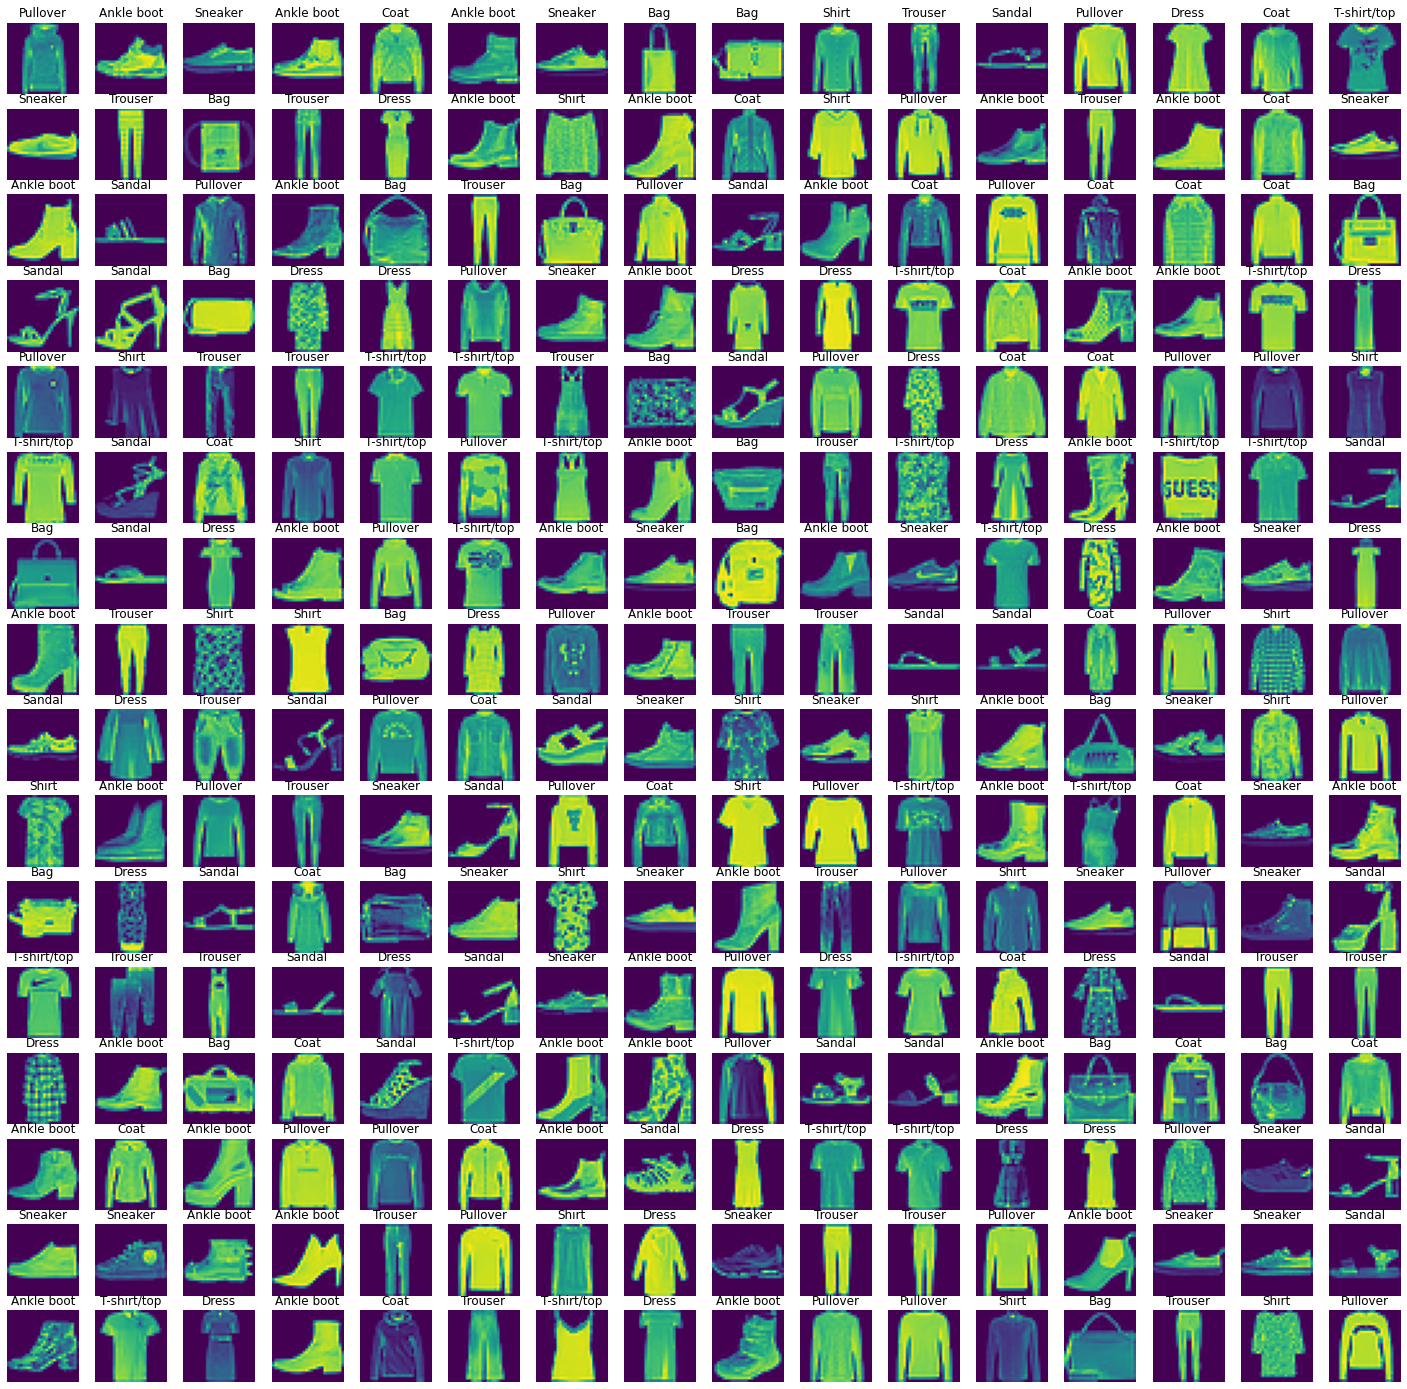

In [ ]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1, label=classes[int(y_train[rand_index])])
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [20]:
X_train[5].min()

0

In [21]:
X_train[5].max()

255

In [22]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
X_train[5].min()

0.0

In [24]:
X_train[5].max()

1.0

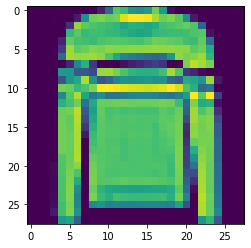

In [25]:
plt.imshow(X_train[5])

In [26]:
y_train[5]

2

In [27]:
classes[2]

'Pullover'

In [28]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [30]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
#first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

#### Dropout layer extra info

[External link to the keras documentation about dropout layers. An important read!](https://keras.io/api/layers/regularization_layers/dropout/)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [97]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5),input_shape=(28, 28, 1), activation='relu',padding="same"))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu',padding="same"))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_15 (Dense)            (None, 64)                401472    
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                      

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

In [100]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [101]:
model.fit(X_train, Y_train, batch_size=64, epochs=15, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/15
938/938 [==============================] - 11s 11ms/step - loss: 0.4913 - accuracy: 0.8202 - val_loss: 0.3549 - val_accuracy: 0.8721
Epoch 2/15
938/938 [==============================] - 10s 10ms/step - loss: 0.3026 - accuracy: 0.8912 - val_loss: 0.2873 - val_accuracy: 0.8947
Epoch 3/15
938/938 [==============================] - 10s 10ms/step - loss: 0.2547 - accuracy: 0.9081 - val_loss: 0.2700 - val_accuracy: 0.9004
Epoch 4/15
938/938 [==============================] - 10s 10ms/step - loss: 0.2211 - accuracy: 0.9187 - val_loss: 0.2520 - val_accuracy: 0.9108
Epoch 5/15
938/938 [==============================] - 10s 10ms/step - loss: 0.1958 - accuracy: 0.9271 - val_loss: 0.2535 - val_accuracy: 0.9098
Epoch 6/15
938/938 [==============================] - 10s 10ms/step - loss: 0.1772 - accuracy: 0.9335 - val_loss: 0.2366 - val_accuracy: 0.9132
Epoch 7/15
938/938 [==============================] - 9s 10ms/step - loss: 0.1526 - accuracy: 0.9426 - val_loss: 0.2701 - val_accuracy: 

In [102]:
model.metrics_names

['loss', 'accuracy']

In [103]:
model.history.history

{'accuracy': [0.8201666474342346,
  0.8911666870117188,
  0.908133327960968,
  0.918749988079071,
  0.9270666837692261,
  0.9335333108901978,
  0.9425666928291321,
  0.9485333561897278,
  0.954716682434082,
  0.960016667842865,
  0.9633499979972839],
 'loss': [0.4912559688091278,
  0.3026115298271179,
  0.25465187430381775,
  0.22105492651462555,
  0.19576871395111084,
  0.1772303730249405,
  0.152608722448349,
  0.13727852702140808,
  0.12148931622505188,
  0.10531817376613617,
  0.09813753515481949],
 'val_accuracy': [0.8720999956130981,
  0.8946999907493591,
  0.9003999829292297,
  0.9107999801635742,
  0.9097999930381775,
  0.9132000207901001,
  0.913100004196167,
  0.916100025177002,
  0.914900004863739,
  0.9157999753952026,
  0.9140999913215637],
 'val_loss': [0.3548997938632965,
  0.28727295994758606,
  0.26998987793922424,
  0.25199735164642334,
  0.25350263714790344,
  0.23661968111991882,
  0.27011099457740784,
  0.2622338831424713,
  0.27393093705177307,
  0.292166739702224

In [104]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.491256,0.820167,0.354900,0.8721
1,0.302612,0.891167,0.287273,0.8947
2,0.254652,0.908133,0.269990,0.9004
3,0.221055,0.918750,0.251997,0.9108
4,0.195769,0.927067,0.253503,0.9098
5,0.177230,0.933533,0.236620,0.9132
6,0.152609,0.942567,0.270111,0.9131
7,0.137279,0.948533,0.262234,0.9161
8,0.121489,0.954717,0.273931,0.9149
9,0.105318,0.960017,0.292167,0.9158


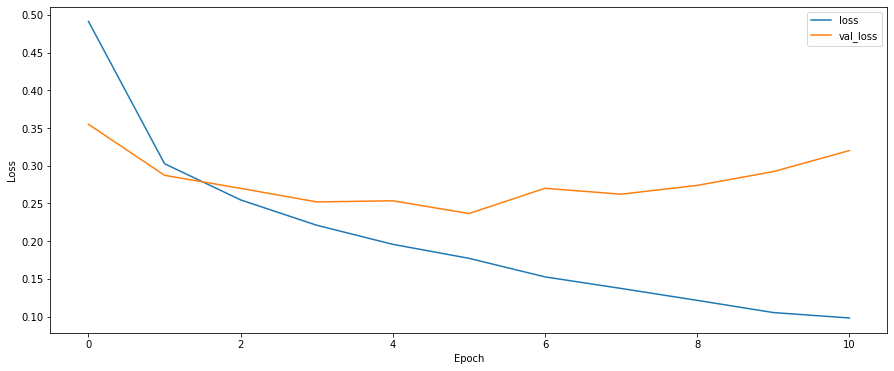

In [105]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

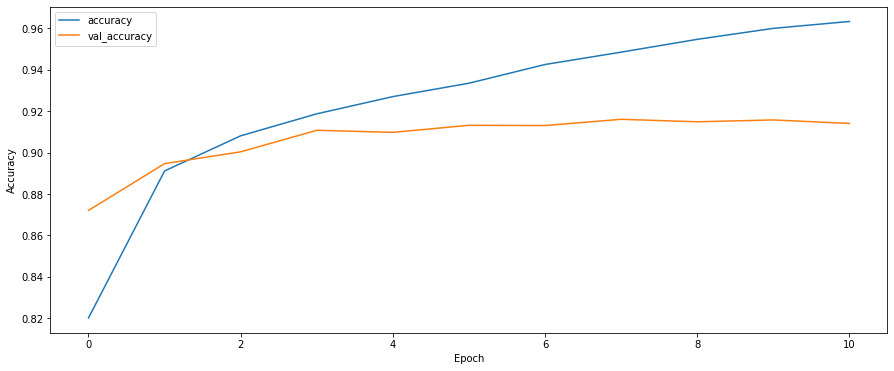

In [106]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [107]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 1s 5ms/step - loss: 0.3201 - accuracy: 0.9141
[0.3200886845588684, 0.9140999913215637]


In [108]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [109]:
preds = model.predict(X_test)


In [110]:
preds

array([[0.        , 0.        , 0.        , ..., 0.00000044, 0.        ,
        0.9999995 ],
       [0.00000001, 0.        , 0.99999726, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00000067, 0.00000056, 0.00000028, ..., 0.00015247, 0.00000237,
        0.0000017 ]], dtype=float32)

In [111]:
predictions = np.argmax(preds, axis=1)

In [112]:
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [113]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.87      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.85      0.88      0.87      1000
           5       0.99      0.99      0.99      1000
           6       0.76      0.72      0.74      1000
           7       0.97      0.97      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.98      0.98      0.98      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [114]:
print(confusion_matrix(y_test, predictions))

[[853   2  13  22   3   1 102   0   4   0]
 [  0 981   1  12   4   0   2   0   0   0]
 [ 14   1 867   7  46   0  65   0   0   0]
 [ 10   1  18 930  26   0  15   0   0   0]
 [  0   1  70  14 876   0  39   0   0   0]
 [  0   0   0   0   0 986   2   8   0   4]
 [117   2  58  30  67   0 717   0   9   0]
 [  0   0   0   0   0   9   0 970   0  21]
 [  4   0   0   3   3   2   1   2 985   0]
 [  0   0   0   0   0   3   1  20   0 976]]


In [115]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3200886845588684
Test accuracy: 0.9140999913215637


In [121]:
my_image = X_test[11]

In [122]:
my_image.shape

(28, 28, 1)

In [123]:
y_train[43]

5

In [124]:
classes[5]

'Sandal'

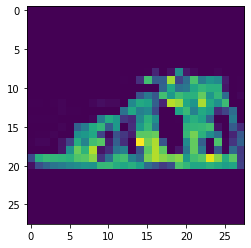

In [125]:
plt.imshow(my_image.reshape(28,28))

In [126]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [127]:
image_prediction

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.9999999 , 0.        , 0.00000009, 0.        , 0.        ]],
      dtype=float32)

In [128]:
np.argmax(image_prediction, axis=1)

array([5])

In [129]:
result=np.argmax(image_prediction, axis=1)

In [130]:
result

array([5])

In [131]:
classes[int(result)]

'Sandal'

In [132]:
model.save("cnn-1.h5")